# KDM6A / Kabuki Syndrome 2 

##### Kabuki 2 Syndrome - [OMIM:300867](https://www.omim.org/entry/300867), MONDO:0010465

LYSINE DEMETHYLASE 6A; **KDM6A** ([OMIM:300128](https://www.omim.org/entry/300128))
- Alternative Symbols:
    - LYSINE-SPECIFIC DEMETHYLASE 6A
    - UBIQUITOUSLY TRANSCRIBED TETRATRICOPEPTIDE REPEAT GENE ON X CHROMOSOME; UTX

#### **Clinical Synopsis**

Kabuki syndrome is a congenital mental retardation syndrome with additional features, including postnatal dwarfism, a peculiar facies characterized by long palpebral fissures with eversion of the lateral third of the lower eyelids (reminiscent of the make-up of actors of Kabuki, a Japanese traditional theatrical form), a broad and depressed nasal tip, large prominent earlobes, a cleft or high-arched palate, scoliosis, short fifth finger, persistence of fingerpads, radiographic abnormalities of the vertebrae, hands, and hip joints, and recurrent otitis media in infancy


#### **USIDNET2024**
- Associated features: Typical facial abnormalities, cleft or high arched palate, skeletal abnormalities, short stature, intellectual disability, congenital heart defects, recurrent infections (otitis media, pneumonia) in 50% of patients. Autoimmunity may be present
- Category: Combined immunodeficiencies with associated or syndromic features


#### **Genotype Phenotype Correlations**

##### KDM6A

- [Faundes et al. (2021)](https://www.omim.org/entry/300867#2) analyzed molecular and clinical data in 80 patients with heterozygous or hemizygous mutations in the KDM6A gene. 
    - **Patients with protein-altering variants (PAVs) had shorter birth lengths compared to patients with protein termination variants (PTVs).** 
    - **Patients with PTVs had more impaired intellectual development (97.6% vs 80%) and a higher frequency of central nervous system anomalies (71.4% vs 28.6%) compared to patients with PAVs**, although the difference did **not reach statistical significance**
    - Faundes et al. (2021) concluded that **individuals with PTVs overall have a more severe phenotype, and the phenotypes of patients with PAVs are more variable.**

In [3]:
cohort_name = 'KDM6A'
mane_tx_id = 'NM_001291415.2'
mane_px_id = 'NP_001278344.1' 

In [4]:
import hpotk
store = hpotk.configure_ontology_store()
hpo = store.load_minimal_hpo()

In [5]:
from ppktstore.registry import configure_phenopacket_registry
phenopacket_registry = configure_phenopacket_registry()
with phenopacket_registry.open_phenopacket_store('0.1.20') as ps:
    phenopackets = tuple(ps.iter_cohort_phenopackets(cohort_name))

In [6]:
from gpsea.preprocessing import configure_caching_cohort_creator, load_phenopackets
cohort_creator = configure_caching_cohort_creator(hpo)
cohort, validation = load_phenopackets(
    phenopackets=phenopackets,
    cohort_creator=cohort_creator,
)

Individuals Processed: 100%|██████████| 81/81 [00:12<00:00,  6.29individuals/s]


In [7]:
validation.summarize()

Validated under none policy
No errors or warnings were found


In [8]:
from IPython.display import HTML, display

from gpsea.view import CohortViewable
viewer = CohortViewable(hpo)
report = viewer.process(cohort=cohort, transcript_id=mane_tx_id)
display(HTML(report))

HPO Term,ID,Seen in n individuals
Abnormal facial shape,HP:0001999,80
Feeding difficulties,HP:0011968,55
Delayed speech and language development,HP:0000750,54
Hypotonia,HP:0001252,52
Narrow palate,HP:0000189,38
Prominent fingertip pads,HP:0001212,35
Neonatal hypoglycemia,HP:0001998,31
Delayed ability to walk,HP:0031936,31
Motor delay,HP:0001270,27
Clinodactyly,HP:0030084,24


In [9]:
from gpsea.model.genome import GRCh38
from gpsea.preprocessing import configure_protein_metadata_service, VVMultiCoordinateService
txc_service = VVMultiCoordinateService(genome_build=GRCh38)
pms = configure_protein_metadata_service()
tx_coordinates = txc_service.fetch(mane_tx_id)
protein_meta = pms.annotate(mane_px_id)

/var/folders/wf/3t934whj4b99bql00wxk8c2c0000gn/T/ipykernel_3073/3496193070.py:4: DeprecationWarning: Use `configure_default_protein_metadata_service` instead
  pms = configure_protein_metadata_service()


ValueError: No proteins found for ID NP_001278344.1. Please verify refseq ID.

NameError: name 'tx_coordinates' is not defined

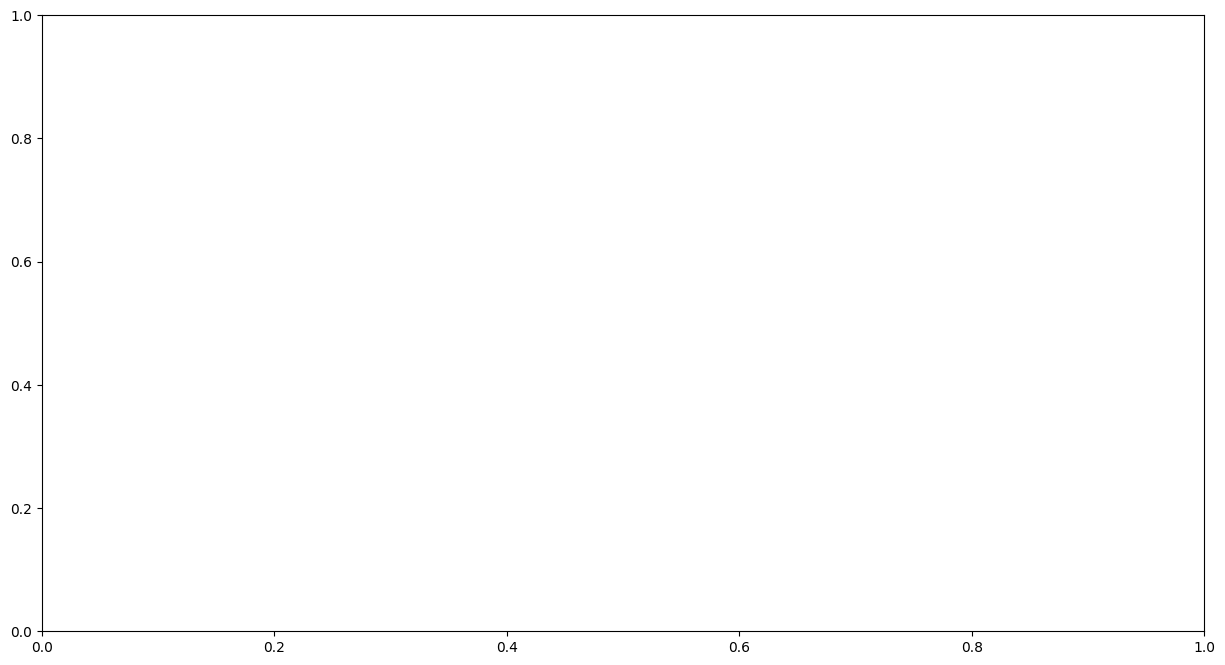

In [ ]:
from gpsea.view import ProteinVisualizer
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15, 8))
visualizer = ProteinVisualizer()
visualizer.draw_protein_diagram(
    tx_coordinates,
    protein_meta,
    cohort,
    ax=ax,
)
fig.tight_layout()

## Correlations

### Correlation of **Female vs Male**

In [10]:
from gpsea.analysis.predicate.genotype import sex_predicate
gt_predicate = sex_predicate()
gt_predicate.display_question()

'Sex of the individual: FEMALE, MALE'

In [11]:
from gpsea.model import FeatureType
from gpsea.analysis.predicate.phenotype import prepare_predicates_for_terms_of_interest
from gpsea.analysis.pcats.stats import FisherExactTest
from gpsea.analysis.mtc_filter import HpoMtcFilter
from gpsea.analysis.pcats import HpoTermAnalysis
from gpsea.view._stats import MtcStatsViewer

pheno_predicates = prepare_predicates_for_terms_of_interest(
    cohort=cohort,
    hpo=hpo,
)

mtc_filter = HpoMtcFilter.default_filter(hpo=hpo, term_frequency_threshold=0.2)
mtc_correction = 'fdr_bh'
statistic = FisherExactTest()

analysis = HpoTermAnalysis(
    count_statistic=statistic,
    mtc_filter=mtc_filter,
    mtc_correction=mtc_correction,
    mtc_alpha=0.05,
)

In [12]:
result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_predicate=gt_predicate,
    pheno_predicates=pheno_predicates,
)

In [13]:
viewer = MtcStatsViewer()
report = viewer.process(result)
display(HTML(report))

Code,Reason,Count
HMF01,Skipping term with maximum frequency that was less than threshold 0.2,18
HMF04,Skipping term because all genotypes have same HPO observed proportions,56
HMF06,Skipping term with less than 7 observations (not powered for 2x2),74
HMF08,Skipping general term,67


In [14]:
from gpsea.view._phenotype_analysis import summarize_hpo_analysis


report = summarize_hpo_analysis(hpo=hpo, result=result)
report

Sex of the individual                              FEMALE           MALE  \
                                                    Count Percent  Count   
Intellectual disability, severe [HP:0010864]         7/25     28%  14/18   
Delayed speech and language development [HP:000...  25/30     83%  29/29   
Decreased body weight [HP:0004325]                   5/23     22%  10/20   
Feeding difficulties [HP:0011968]                   28/35     80%  27/28   
Intellectual disability [HP:0001249]                30/34     88%  23/23   
Seizure [HP:0001250]                                 7/26     27%  10/21   
Hydrocephalus [HP:0000238]                           0/13      0%   3/15   
Delayed gross motor development [HP:0002194]        15/18     83%  16/16   
Motor delay [HP:0001270]                            28/31     90%  30/30   
Intellectual disability, moderate [HP:0002342]       7/25     28%   2/18   
Intellectual disability, mild [HP:0001256]           7/25     28%   2/18   
Delayed CNS myelination [HP:0002188]                  2/7     29%   1/13   
Delayed ability to walk [HP:0031936]                15/22     68%  16/19   
Microcephaly [HP:0000252]                           13/26     50%  11/17   
Short stature [HP:0004322]                          10/25     40%  12/21   
Ventriculomegaly [HP:0002119]                         1/2     50%    7/9   
Hearing impairment [HP:0000365]                      3/12     25%   5/14   
Prominent fingertip pads [HP:0001212]               25/31     81%  10/14   
Hypotonia [HP:0001252]                              30/37     81%  22/27   
Neonatal hypoglycemia [HP:0001998]                  19/33     58%  12/22   
Strabismus [HP:0000486]                              9/20     45%   7/15   
Intrauterine growth retardation [HP:0001511]         3/12     25%   3/14   
Atrial septal defect [HP:0001631]                    9/34     26%   7/27   

Sex of the individual                                                          \
                                                   Percent Corrected p values   
Intellectual disability, severe [HP:0010864]           78%           0.044689   
Delayed speech and language development [HP:000...    100%           0.380630   
Decreased body weight [HP:0004325]                     50%           0.380630   
Feeding difficulties [HP:0011968]                      96%           0.380630   
Intellectual disability [HP:0001249]                  100%           0.516388   
Seizure [HP:0001250]                                   48%           0.516388   
Hydrocephalus [HP:0000238]                             20%           0.516388   
Delayed gross motor development [HP:0002194]          100%           0.516388   
Motor delay [HP:0001270]                              100%           0.516388   
Intellectual disability, moderate [HP:0002342]         11%           0.516388   
Intellectual disability, mild [HP:0001256]             11%           0.516388   
Delayed CNS myelination [HP:0002188]                    8%           0.516388   
Delayed ability to walk [HP:0031936]                   84%           0.516388   
Microcephaly [HP:0000252]                              65%           0.574326   
Short stature [HP:0004322]                             57%           0.574326   
Ventriculomegaly [HP:0002119]                          78%           0.705682   
Hearing impairment [HP:0000365]                        36%           0.894401   
Prominent fingertip pads [HP:0001212]                  71%           0.894401   
Hypotonia [HP:0001252]                                 81%           1.000000   
Neonatal hypoglycemia [HP:0001998]                     55%           1.000000   
Strabismus [HP:0000486]                                47%           1.000000   
Intrauterine growth retardation [HP:0001511]           21%           1.000000   
Atrial septal defect [HP:0001631]                      26%           1.000000   

Sex of the individual                                         
          

### Correlation **Mutation Type**

#### **FRAMESHIFT vs rest**

In [15]:
from gpsea.model import VariantEffect
from gpsea.model.genome import Region

from gpsea.analysis.predicate.genotype import VariantPredicates, ModeOfInheritancePredicate

missense_pred = VariantPredicates.variant_effect(VariantEffect.FRAMESHIFT_VARIANT, mane_tx_id)
splice = VariantPredicates.variant_effect(VariantEffect.SPLICE_REGION_VARIANT, mane_tx_id)

gt_predicate = ModeOfInheritancePredicate.autosomal_dominant(missense_pred | splice)


/var/folders/wf/3t934whj4b99bql00wxk8c2c0000gn/T/ipykernel_3073/3639784905.py:9: DeprecationWarning: Use `gpsea.analysis.predicate.genotype.autosomal_dominant` instead
  gt_predicate = ModeOfInheritancePredicate.autosomal_dominant(missense_pred | splice)


In [16]:
pheno_predicates = prepare_predicates_for_terms_of_interest(
    cohort=cohort,
    hpo=hpo,
)

mtc_filter = HpoMtcFilter.default_filter(hpo=hpo, term_frequency_threshold=0.2)
mtc_correction = 'fdr_bh'
statistic = FisherExactTest()

analysis = HpoTermAnalysis(
    count_statistic=statistic,
    mtc_filter=mtc_filter,
    mtc_correction=mtc_correction,
    mtc_alpha=0.05,
)


In [17]:
result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_predicate=gt_predicate,
    pheno_predicates=pheno_predicates,
)

In [18]:
viewer = MtcStatsViewer()
report = viewer.process(result)
display(HTML(report))

Code,Reason,Count
HMF01,Skipping term with maximum frequency that was less than threshold 0.2,16
HMF02,Skipping term because no genotype has more than one observed HPO count,3
HMF04,Skipping term because all genotypes have same HPO observed proportions,56
HMF06,Skipping term with less than 7 observations (not powered for 2x2),74
HMF08,Skipping general term,67


In [19]:
report = summarize_hpo_analysis(hpo=hpo, result=result)
report

What is the genotype group                         HOM_REF            HET  \
                                                     Count Percent  Count   
Microcephaly [HP:0000252]                            21/30     70%   3/13   
Short stature [HP:0004322]                           19/32     59%   3/14   
Intellectual disability [HP:0001249]                 40/41     98%  13/16   
Nystagmus [HP:0000639]                                1/28      4%    2/7   
Seizure [HP:0001250]                                  9/32     28%   8/15   
Delayed speech and language development [HP:000...   40/42     95%  14/17   
Delayed gross motor development [HP:0002194]         24/25     96%    7/9   
Motor delay [HP:0001270]                             43/44     98%  15/17   
Intellectual disability, severe [HP:0010864]         17/31     55%   4/12   
Feeding difficulties [HP:0011968]                    42/47     89%  13/16   
Delayed ability to walk [HP:0031936]                 24/30     80%   7/11   
Prominent fingertip pads [HP:0001212]                27/34     79%   8/11   
Intellectual disability, mild [HP:0001256]            6/31     19%   3/12   
Decreased body weight [HP:0004325]                   11/29     38%   4/14   
Neonatal hypoglycemia [HP:0001998]                   25/43     58%   6/12   
Hypotonia [HP:0001252]                               41/51     80%  11/13   
Strabismus [HP:0000486]                              13/28     46%    3/7   
Intrauterine growth retardation [HP:0001511]          5/23     22%    1/3   
Intellectual disability, moderate [HP:0002342]        7/31     23%   2/12   
Hearing impairment [HP:0000365]                       7/22     32%    1/4   
Atrial septal defect [HP:0001631]                    12/45     27%   4/16   
Ventriculomegaly [HP:0002119]                         7/10     70%    1/1   

What is the genotype group                                                     \
                                                   Percent Corrected p values   
Microcephaly [HP:0000252]                              23%           0.158155   
Short stature [HP:0004322]                             21%           0.281749   
Intellectual disability [HP:0001249]                   81%           0.460039   
Nystagmus [HP:0000639]                                 29%           0.503310   
Seizure [HP:0001250]                                   53%           0.503310   
Delayed speech and language development [HP:000...     82%           0.506547   
Delayed gross motor development [HP:0002194]           78%           0.509197   
Motor delay [HP:0001270]                               88%           0.509197   
Intellectual disability, severe [HP:0010864]           33%           0.758156   
Feeding difficulties [HP:0011968]                      81%           0.826477   
Delayed ability to walk [HP:0031936]                   64%           0.826477   
Prominent fingertip pads [HP:0001212]                  73%           1.000000   
Intellectual disability, mild [HP:0001256]             25%           1.000000   
Decreased body weight [HP:0004325]                     29%           1.000000   
Neonatal hypoglycemia [HP:0001998]                     50%           1.000000   
Hypotonia [HP:0001252]                                 85%           1.000000   
Strabismus [HP:0000486]                                43%           1.000000   
Intrauterine growth retardation [HP:0001511]           33%           1.000000   
Intellectual disability, moderate [HP:0002342]         17%           1.000000   
Hearing impairment [HP:0000365]                        25%           1.000000   
Atrial septal defect [HP:0001631]                      25%           1.000000   
Ventriculomegaly [HP:0002119]                         100%           1.000000   

What is the genotype group                                    
                                                    p values  
Microcephaly [HP:0000252]                           0.007189  
Short stature [HP

### Correlation specific Variant 

In [20]:
from gpsea.analysis.predicate.genotype import VariantPredicates, monoallelic_predicate
is_var_key = VariantPredicates.variant_key("X_45070166_45070170_CACAA_C")

gt_predicate = monoallelic_predicate(
    a_predicate=is_var_key,
    b_predicate= ~is_var_key,
    names=('p.Asn891ValfsTer27', 'Other variant')
)
gt_predicate.display_question()


'Allele group: p.Asn891ValfsTer27, Other variant'

In [21]:
pheno_predicates = prepare_predicates_for_terms_of_interest(
    cohort=cohort,
    hpo=hpo,
)

In [22]:
mtc_filter = HpoMtcFilter.default_filter(hpo=hpo, term_frequency_threshold=0.2)
mtc_correction = 'fdr_bh'
statistic = FisherExactTest()

analysis = HpoTermAnalysis(
    count_statistic=statistic,
    mtc_filter=mtc_filter,
    mtc_correction=mtc_correction,
    mtc_alpha=0.05,
)

In [23]:
result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_predicate=gt_predicate,
    pheno_predicates=pheno_predicates,
)

In [24]:
viewer = MtcStatsViewer()
report = viewer.process(result)
display(HTML(report))

Code,Reason,Count
HMF01,Skipping term with maximum frequency that was less than threshold 0.2,18
HMF04,Skipping term because all genotypes have same HPO observed proportions,28
HMF05,Skipping term because one genotype had zero observations,42
HMF06,Skipping term with less than 7 observations (not powered for 2x2),74
HMF08,Skipping general term,67


In [25]:
report = summarize_hpo_analysis(hpo=hpo, result=result)
report

Allele group                                       p.Asn891ValfsTer27          \
                                                                Count Percent   
Pulmonic stenosis [HP:0001642]                                    2/2    100%   
Atrial septal defect [HP:0001631]                                 2/2    100%   
Seizure [HP:0001250]                                              2/2    100%   
Ventricular septal defect [HP:0001629]                            1/2     50%   
Prominent fingertip pads [HP:0001212]                             2/3     67%   
Feeding difficulties [HP:0011968]                                 1/1    100%   
Motor delay [HP:0001270]                                          2/2    100%   
Delayed speech and language development [HP:000...                2/2    100%   
Hearing impairment [HP:0000365]                                   0/1      0%   

Allele group                                       Other variant          \
                                                           Count Percent   
Pulmonic stenosis [HP:0001642]                              0/59      0%   
Atrial septal defect [HP:0001631]                          14/59     24%   
Seizure [HP:0001250]                                       15/45     33%   
Ventricular septal defect [HP:0001629]                      4/59      7%   
Prominent fingertip pads [HP:0001212]                      33/42     79%   
Feeding difficulties [HP:0011968]                          54/62     87%   
Motor delay [HP:0001270]                                   56/59     95%   
Delayed speech and language development [HP:000...         52/57     91%   
Hearing impairment [HP:0000365]                             8/25     32%   

Allele group                                                           \
                                                   Corrected p values   
Pulmonic stenosis [HP:0001642]                               0.004918   
Atrial septal defect [HP:0001631]                            0.295082   
Seizure [HP:0001250]                                         0.356557   
Ventricular septal defect [HP:0001629]                       0.356557   
Prominent fingertip pads [HP:0001212]                        0.969767   
Feeding difficulties [HP:0011968]                            1.000000   
Motor delay [HP:0001270]                                     1.000000   
Delayed speech and language development [HP:000...           1.000000   
Hearing impairment [HP:0000365]                              1.000000   

Allele group                                                  
                                                    p values  
Pulmonic stenosis [HP:0001642]                      0.000546  
Atrial septal defect [HP:0001631]                   0.065574  
Seizure [HP:0001250]                                0.125809  
Ventricular septal defect [HP:0001629]              0.158470  
Prominent fingertip pads [HP:0001212]               0.538760  
Feeding difficulties [HP:0011968]                   1.000000  
Motor delay [HP:0001270]                            1.000000  
Delayed speech and language development [HP:000...  1.000000  
Hearing impairment [HP:0000365]                     1.000000

### Summary

-  **M vs F**: significant correlation found regarding severe intellectual disability (corrected p.value: 0.044): Male were found to have more severe intelectual disability

- **Mutation Types** : no significant correlation found

- **Specific Variant**: Significant correlation found for "X_45070166_45070170_CACAA_C" 
for Pulmonic stenosis [HP:0001642] (corrected p.value 0.0049) but to be taken with caution due to low number of instances of the variant.


